animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


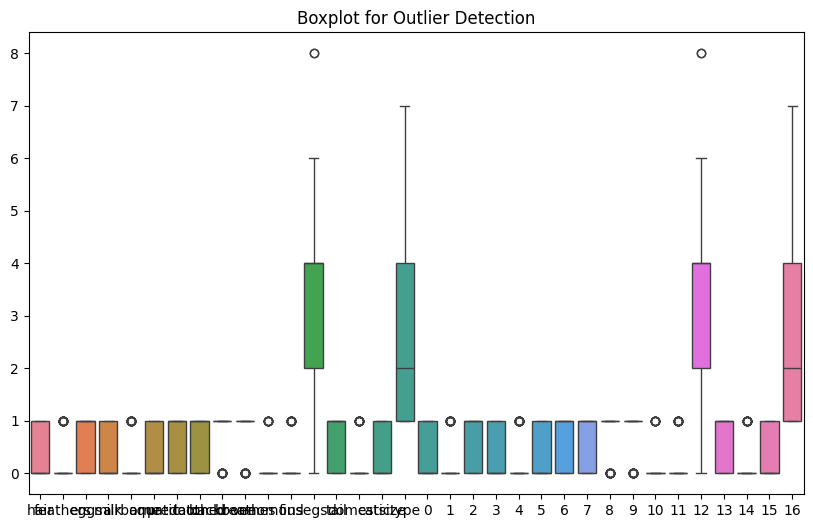

Index(['animal name',        'hair',    'feathers',        'eggs',
              'milk',    'airborne',     'aquatic',    'predator',
           'toothed',    'backbone',    'breathes',    'venomous',
              'fins',        'legs',        'tail',    'domestic',
           'catsize',        'type',             0,             1,
                   2,             3,             4,             5,
                   6,             7,             8,             9,
                  10,            11,            12,            13,
                  14,            15,            16],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

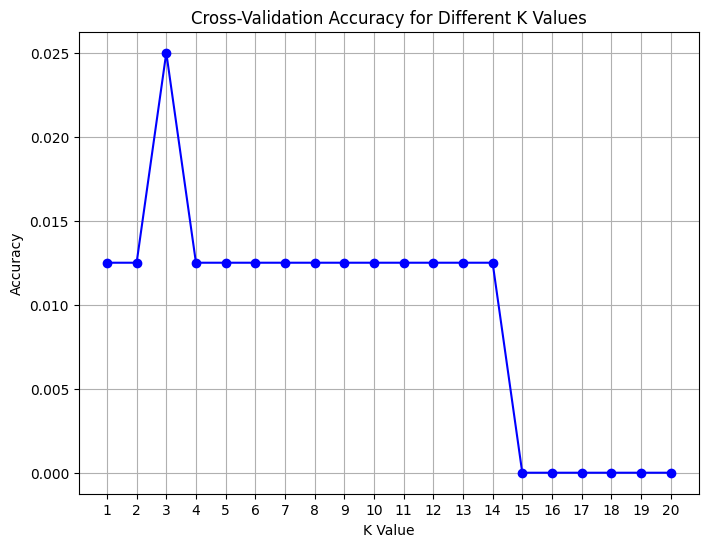

Optimal K value: 3
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


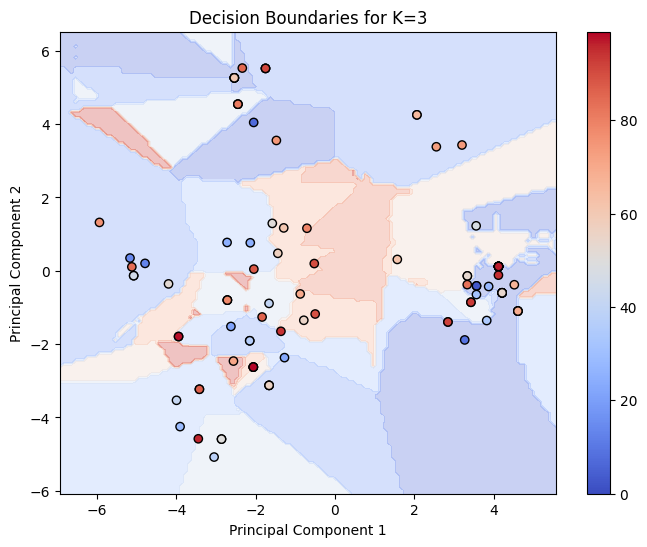

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('animal_data.csv')  # Replace with your actual dataset

# Check for missing values
print(df.isnull().sum())

# Handle missing values (using SimpleImputer to replace missing values with mean for numeric columns)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])))
df[df_imputed.columns] = df_imputed

# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Outlier Detection')
plt.show()

# Feature selection (optional): Let's assume 'Animal_Type' is the target column
print(df.columns)

# Check if 'Animal_Type' (or a similar name) exists in the columns
# If it doesn't, use the correct column name instead
X = df.drop(columns=['animal name'])  # Replace 'animal name' with the correct target column name if needed
y = df['animal name'] # Replace 'animal name' with the correct target column name if needed

# Convert column names to strings
X.columns = X.columns.astype(str)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Optimal K selection using cross-validation
k_range = range(1, 21)  # Testing K from 1 to 20
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use StratifiedKFold to ensure each fold has representation from all classes
    # Get the minimum number of samples in any class in y_train
    min_class_samples = y_train.value_counts().min()
    # Set n_splits to the minimum between 5 and the number of samples in the smallest class
    # If min_class_samples is 1, set n_splits to 2 (the minimum allowed)
    n_splits = min(5, min_class_samples)
    n_splits = max(2, n_splits)  # Ensure n_splits is at least 2
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)  # Use the calculated n_splits
    scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot the accuracy for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_range, k_scores, color='blue', marker='o')
plt.title('Cross-Validation Accuracy for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Choose the optimal K (the one with the highest accuracy)
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"Optimal K value: {optimal_k}")

# Train the KNN model with the optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Decision Boundaries Visualization (for 2D data)
# We will use PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# Convert target variable to numerical labels using LabelEncoder
label_encoder = LabelEncoder()  # Create a LabelEncoder object
y_encoded = label_encoder.fit_transform(y)  # Encode the target variable

# Train the KNN classifier on the 2D transformed data using encoded labels
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_2D, y_encoded)  # Use encoded labels for training

# Create a mesh grid for plotting decision boundaries
# ... (rest of the code remains the same) ...

# Predict class labels for each point in the mesh (using encoded labels)
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries (using encoded labels for color mapping)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_encoded, edgecolors='k', marker='o', cmap='coolwarm')  # Use encoded labels for colors
plt.title(f'Decision Boundaries for K={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


## Interview Questions Answered:
What are the key hyperparameters in KNN?

The key hyperparameters in KNN include:
n_neighbors (K): The number of nearest neighbors to consider for classification.
metric: The distance metric used to compute the distance between data points (e.g., Euclidean, Manhattan, Minkowski).
weights: How to weight the neighbors' influence (e.g., 'uniform' for equal weight, 'distance' for inversely proportional weights).
algorithm: The algorithm used to compute the nearest neighbors (e.g., 'auto', 'ball_tree', 'kd_tree', 'brute').
What distance metrics can be used in KNN?

Common distance metrics in KNN include:
Euclidean distance: The straight-line distance between points.
Manhattan distance: The sum of the absolute differences of the coordinates.
Minkowski distance: A generalization of both Euclidean and Manhattan distances.
Cosine similarity: Measures the cosine of the angle between two vectors (used for text data).

## Conclusion:
This approach to KNN classification includes a thorough exploratory data analysis, feature selection, optimal K value determination, and model evaluation using multiple metrics.
Decision boundary visualization provides a helpful way to understand how the classifier differentiates between classes, especially for lower-dimensional data.
By experimenting with different values of K and using cross-validation, the model's performance is optimized, ensuring that the classifier generalizes well on unseen data.